In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display,Latex, display_latex

,Bestaetigte Faelle,Tote,Absoluter Zuwachs,Geglaetetter Zuwachs
Datum,,,,
24.02.20,16,0,16,16
25.02.20,18,0,2,2
26.02.20,21,0,3,2
27.02.20,26,0,5,3
28.02.20,53,0,27,19
29.02.20,66,0,13,17
01.03.20,117,0,51,37
02.03.20,150,0,33,38
03.03.20,188,0,38,35


,Bestaetigte Faelle,Tote,Absoluter Zuwachs,Geglaetetter Zuwachs
count,27.000000,27.000000,27.000000,27.000000
mean,3136.592593,6.296296,617.111111,582.814815
std,4568.914980,10.943262,886.496663,837.986783
min,16.000000,0.000000,2.000000,2.000000
25%,133.500000,0.000000,35.500000,36.000000
50%,902.000000,0.000000,160.000000,183.000000
75%,4316.500000,10.000000,922.000000,834.500000
max,16662.000000,46.000000,2958.000000,2905.000000


Bestaetigte Faelle      int64
Tote                    int64
Absoluter Zuwachs       int64
Geglaetetter Zuwachs    int64
dtype: object

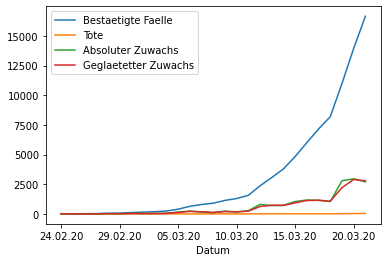

In [202]:
# Daten aus CSV einlesen
data_ger = pd.read_csv('../../data/data_germany.csv', delimiter=';')

# Datum als Index
data_ger.set_index('Datum', inplace=True, verify_integrity=True)

# Feld absoluter Zuwachs hinzufügen
abs_val = [data_ger['Bestaetigte Faelle'][0]]
for i in range(1, len(data_ger['Bestaetigte Faelle'])):
    abs_val.append(data_ger['Bestaetigte Faelle'][i] - data_ger['Bestaetigte Faelle'][i - 1])
data_ger['Absoluter Zuwachs'] = abs_val

# Feld geglätteter Zuwachs hinzufügen (Tiefpassfilter mit n=3)
flat = data_ger['Absoluter Zuwachs'].head(2).values
for index in range(2, len(data_ger['Absoluter Zuwachs'])):
    flat = np.append(flat, (data_ger['Absoluter Zuwachs'][index] + data_ger['Absoluter Zuwachs'][index - 1] + data_ger['Absoluter Zuwachs'][index] - 2) / 3)
data_ger['Geglaetetter Zuwachs'] = flat.astype('int')

display(data_ger)
display(data_ger.describe())

# Plotten
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
data_ger.plot(ax=ax)

display(data_ger.dtypes)